# Q).1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [ ]:
import numpy as np
import string#special operations on strings
import spacy#Language models
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline

In [18]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('Elon_musk.csv',encoding='ISO-8859-1')
df.drop(['Unnamed: 0'],inplace=True,axis=1)
df

Text
0                                @kunalb11 Im an alien
1     @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                   @joerogan @Spotify Great interview!
3                       @gtera27 Doge is underestimated
4     @teslacn Congratulations Tesla China for amazi...
...                                                 ...
1994  @flcnhvy True, it sounds so surreal, but the n...
1995  @PPathole Make sure to read ur terms &amp; con...
1996                @TeslaGong @PPathole Samwise Gamgee
1997  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                          Progress update August 28

[1999 rows x 1 columns]

In [19]:
'  '.strip()

''

# Text Processing

In [20]:
df = [Text.strip() for Text in df.Text]#remove both the leading and the trailing characters.
df = [Text for Text in df if Text]#removes empty strings,because they are considered in python as false.
df[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [21]:
#joing the list into one string or text
df_text = ' '.join(df)
df_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [22]:

#Punctuation
no_punc_text = df_text.translate(str.maketrans('', '', string.punctuation)) #with arguments (x, y, z) where 'x' and 'y'
# must be equal-length strings and characters in 'x'
# are replaced by characters in 'y'. 'z'
# is a string (string.punctuation here)
no_punc_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewal

# Tokenization

In [23]:
from nltk.tokenize import TweetTokenizer
tokens = TweetTokenizer(strip_handles=True)
tweet_tokens = tokens.tokenize(no_punc_text)#removes twitter username handles
print(tweet_tokens[0:60]) #displaying first 50 usernames involved

['kunalb', '11', 'I', '\x92', 'm', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera', '27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'httpstco', '9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought']


In [24]:
len(tweet_tokens)

22604

In [25]:
# remove http or any url within the text
import re
no_url_text = re.sub(r'http\S+',' ',no_punc_text)
no_url_text

'kunalb11 I\x92m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox   Frodo was the underdoge\nAll thought he would fail\nHimself most of all   OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest   geoffkeighley UnrealEngine It\x92s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha   freewalletorg Any crypto wallet that won\x92t give you your private keys sh

In [27]:
# Remove Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
my_stop_words = stopwords.words('english')
my_stop_words.append('the')    
no_stop_tokens = [word for word in tweet_tokens if not word in my_stop_words]
print(no_stop_tokens[0:50])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ithes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ithes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['kunalb', '11', 'I', '\x92', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera', '27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco', '9WFKMYu2oj', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrM', 'OwenSparks', 'flcnhvy', 'anonyx', '10']


In [28]:
len(no_stop_tokens)

16856

In [29]:
# Normalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:50])

['kunalb', '11', 'i', '\x92', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera', '27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'httpstco', '9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owensparks', 'flcnhvy', 'anonyx', '10']


In [30]:
#stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['kunalb', '11', 'i', '\x92', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera', '27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'httpstco', '9wfkmyu2oj', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'owenspark', 'flcnhvi', 'anonyx', '10', 'haha', 'thank', 'flcnhvi', 'anonyx', '10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'httpstco', '3rwe9uhst', 'geoffkeighley', 'unrealengin', 'it', '\x92', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account',

In [31]:
! python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 12.8/12.8 MB 8.0 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [32]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [33]:
#lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:50])

kunalb 11 I  alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried joerogan Spotify Great interview gtera 27 Doge underestimated teslacn Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox httpstco 9WFKMYu2oj Frodo underdoge All thought would fail Himself httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx 10


In [35]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:50])

['kunalb', '11', 'I', '\x92', 'alien', 'IDAACarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera', '27', 'Doge', 'underestimate', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'httpstco', '9wfkmyu2oj', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrm', 'OwenSparks', 'flcnhvy', 'anonyx', '10']


In [36]:
final_tweets = ' '.join(lemmas)
final_tweets

'kunalb 11 I \x92 alien IDAACarmack Ray trace Cyberpunk HDR nextlevel have try joerogan spotify great interview gtera 27 Doge underestimate teslacn Congratulations Tesla China amazing execution last year now next even Happy New Year Ox httpstco 9wfkmyu2oj frodo underdoge all thought would fail himself httpstcozgxjfdzzrm OwenSparks flcnhvy anonyx 10 Haha thanks flcnhvy anonyx 10 Indeed tweet definitely represent realworld time allocation the entertaining outcome likely GiveDirectly just send just agree Clubhouse kanyewest httpstco 3rwe9uhsts geoffkeighley UnrealEngine it \x92 get real buy Dogecoin lil x toddler hodler JoshManMode he definitely issue sentencing seem bit high freewalletorg thank fix freewalletorg please unlock account AstroJordy U0001F923U0001F923 this true power haha httpstcoFc 9uhQSd7O freewalletorg any crypto wallet \x92 give private key avoid cost freewalletorg your app suck RT SpaceX NASA select Falcon Heavy launch first two element lunar Gateway together one mission

# Feature Extraction

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(lemmas)
print(vectorizer.vocabulary_)

{'kunalb': 3103, '11': 77, 'alien': 807, 'idaacarmack': 2842, 'ray': 4017, 'trace': 4891, 'cyberpunk': 1533, 'hdr': 2248, 'nextlevel': 3551, 'have': 2242, 'try': 4926, 'joerogan': 3024, 'spotify': 4510, 'great': 2180, 'interview': 2952, 'gtera': 2199, '27': 197, 'doge': 1686, 'underestimate': 5059, 'teslacn': 4737, 'congratulations': 1429, 'tesla': 4731, 'china': 1313, 'amazing': 832, 'execution': 1898, 'last': 3122, 'year': 5329, 'now': 3591, 'next': 3550, 'even': 1870, 'happy': 2229, 'new': 3547, 'ox': 3709, 'httpstco': 2335, '9wfkmyu2oj': 691, 'frodo': 2066, 'underdoge': 5058, 'all': 810, 'thought': 4816, 'would': 5305, 'fail': 1934, 'himself': 2294, 'httpstcozgxjfdzzrm': 2802, 'owensparks': 3706, 'flcnhvy': 2008, 'anonyx': 861, '10': 69, 'haha': 2214, 'thanks': 4775, 'indeed': 2891, 'tweet': 4948, 'definitely': 1588, 'represent': 4098, 'realworld': 4041, 'time': 4834, 'allocation': 812, 'the': 4782, 'entertaining': 1826, 'outcome': 3686, 'likely': 3184, 'givedirectly': 2151, 'just'

In [39]:
type(vectorizer.vocabulary_)

dict

In [40]:
print(vectorizer.get_feature_names()[0:50])
print(x.toarray())

['00', '0001f44c', '0001f484', '0001f525', '0001f5a4u0001f1e9u0001f1ea', '0001f62c', '005', '00aq', '00chy', '01', '01996367', '01qsu1wt', '02', '03', '046jbmc7o', '05hl', '06dlj', '07puoramgo', '07yc02p7', '08vd4y', '09', '095whx44bx', '09wtaw', '0ckvhrmtf1', '0ct', '0ct2svangy', '0cu2hn', '0dgurmk', '0ewnlv', '0f8', '0fi3chxc', '0fib1w94z', '0gutz4kgij', '0hh8qcg', '0hio', '0i2w8wnkg', '0ibpx3t5', '0iha7z6c', '0ix', '0k7', '0kaav0dtnn', '0lygotobi', '0mhrqjxy', '0mtruc', '0o', '0oophpp7', '0p8xvuf', '0pmcioic', '0qx', '0rc72s0zay']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [41]:
print(x.toarray().shape)

(16905, 5362)


# Count vectorizer(Bigrams and Trigrams)

In [42]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(lemmas)

In [43]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['45', 'actually', 'ajtourville', 'also', 'amp', 'austinbarnard', 'big', 'car', 'cleantechnica', 'come', 'cool', 'could', 'crew', 'day', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'httpstco', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'that', 'the', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'u0001f923u0001f923', 'use', 'way', 'we', 'week', 'well', 'wholemarsblog', 'will', 'work', 'would', 'yeah', 'ye

# TFIDF vectorizer

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_ngram_max_features = TfidfVectorizer(analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram_max_features = vectorizer_ngram_max_features.fit_transform(lemmas)

In [63]:
print(vectorizer_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram_max_features.toarray())

['10', '100', '11742', '13031925', '15', '20', '247', '28delayslater', '30', '305', '3d', '3owner', '45', '60', '74', '85', '8p', 'able', 'absolutely', 'access', 'accurate', 'actually', 'adamklotz', 'add', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'apply', 'appreciate', 'archillect', 'around', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'austinbarnard', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'bbcsciencenews', 'be', 'become', 'benmezrich', 'berlin', 'berniesanders', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'bs', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'confirm', 'congratulations', 'control', 'cool', 'cost', 'could', 'course', 'cov', 'create', 'crew', 'critical', 'curevac', 'cyberpunkgame', 'cybertruck', 'day', 'dee

# Generate Word Cloud

In [77]:
from wordcloud import WordCloud, STOPWORDS
#define a function to plot word cloud
def plot_cloud(wordcloud):
    #set figure size
    plt.figure(figsize=(40,30))
    #display image
    plt.imshow(wordcloud)
    # no axis details
    plt.axis('off');

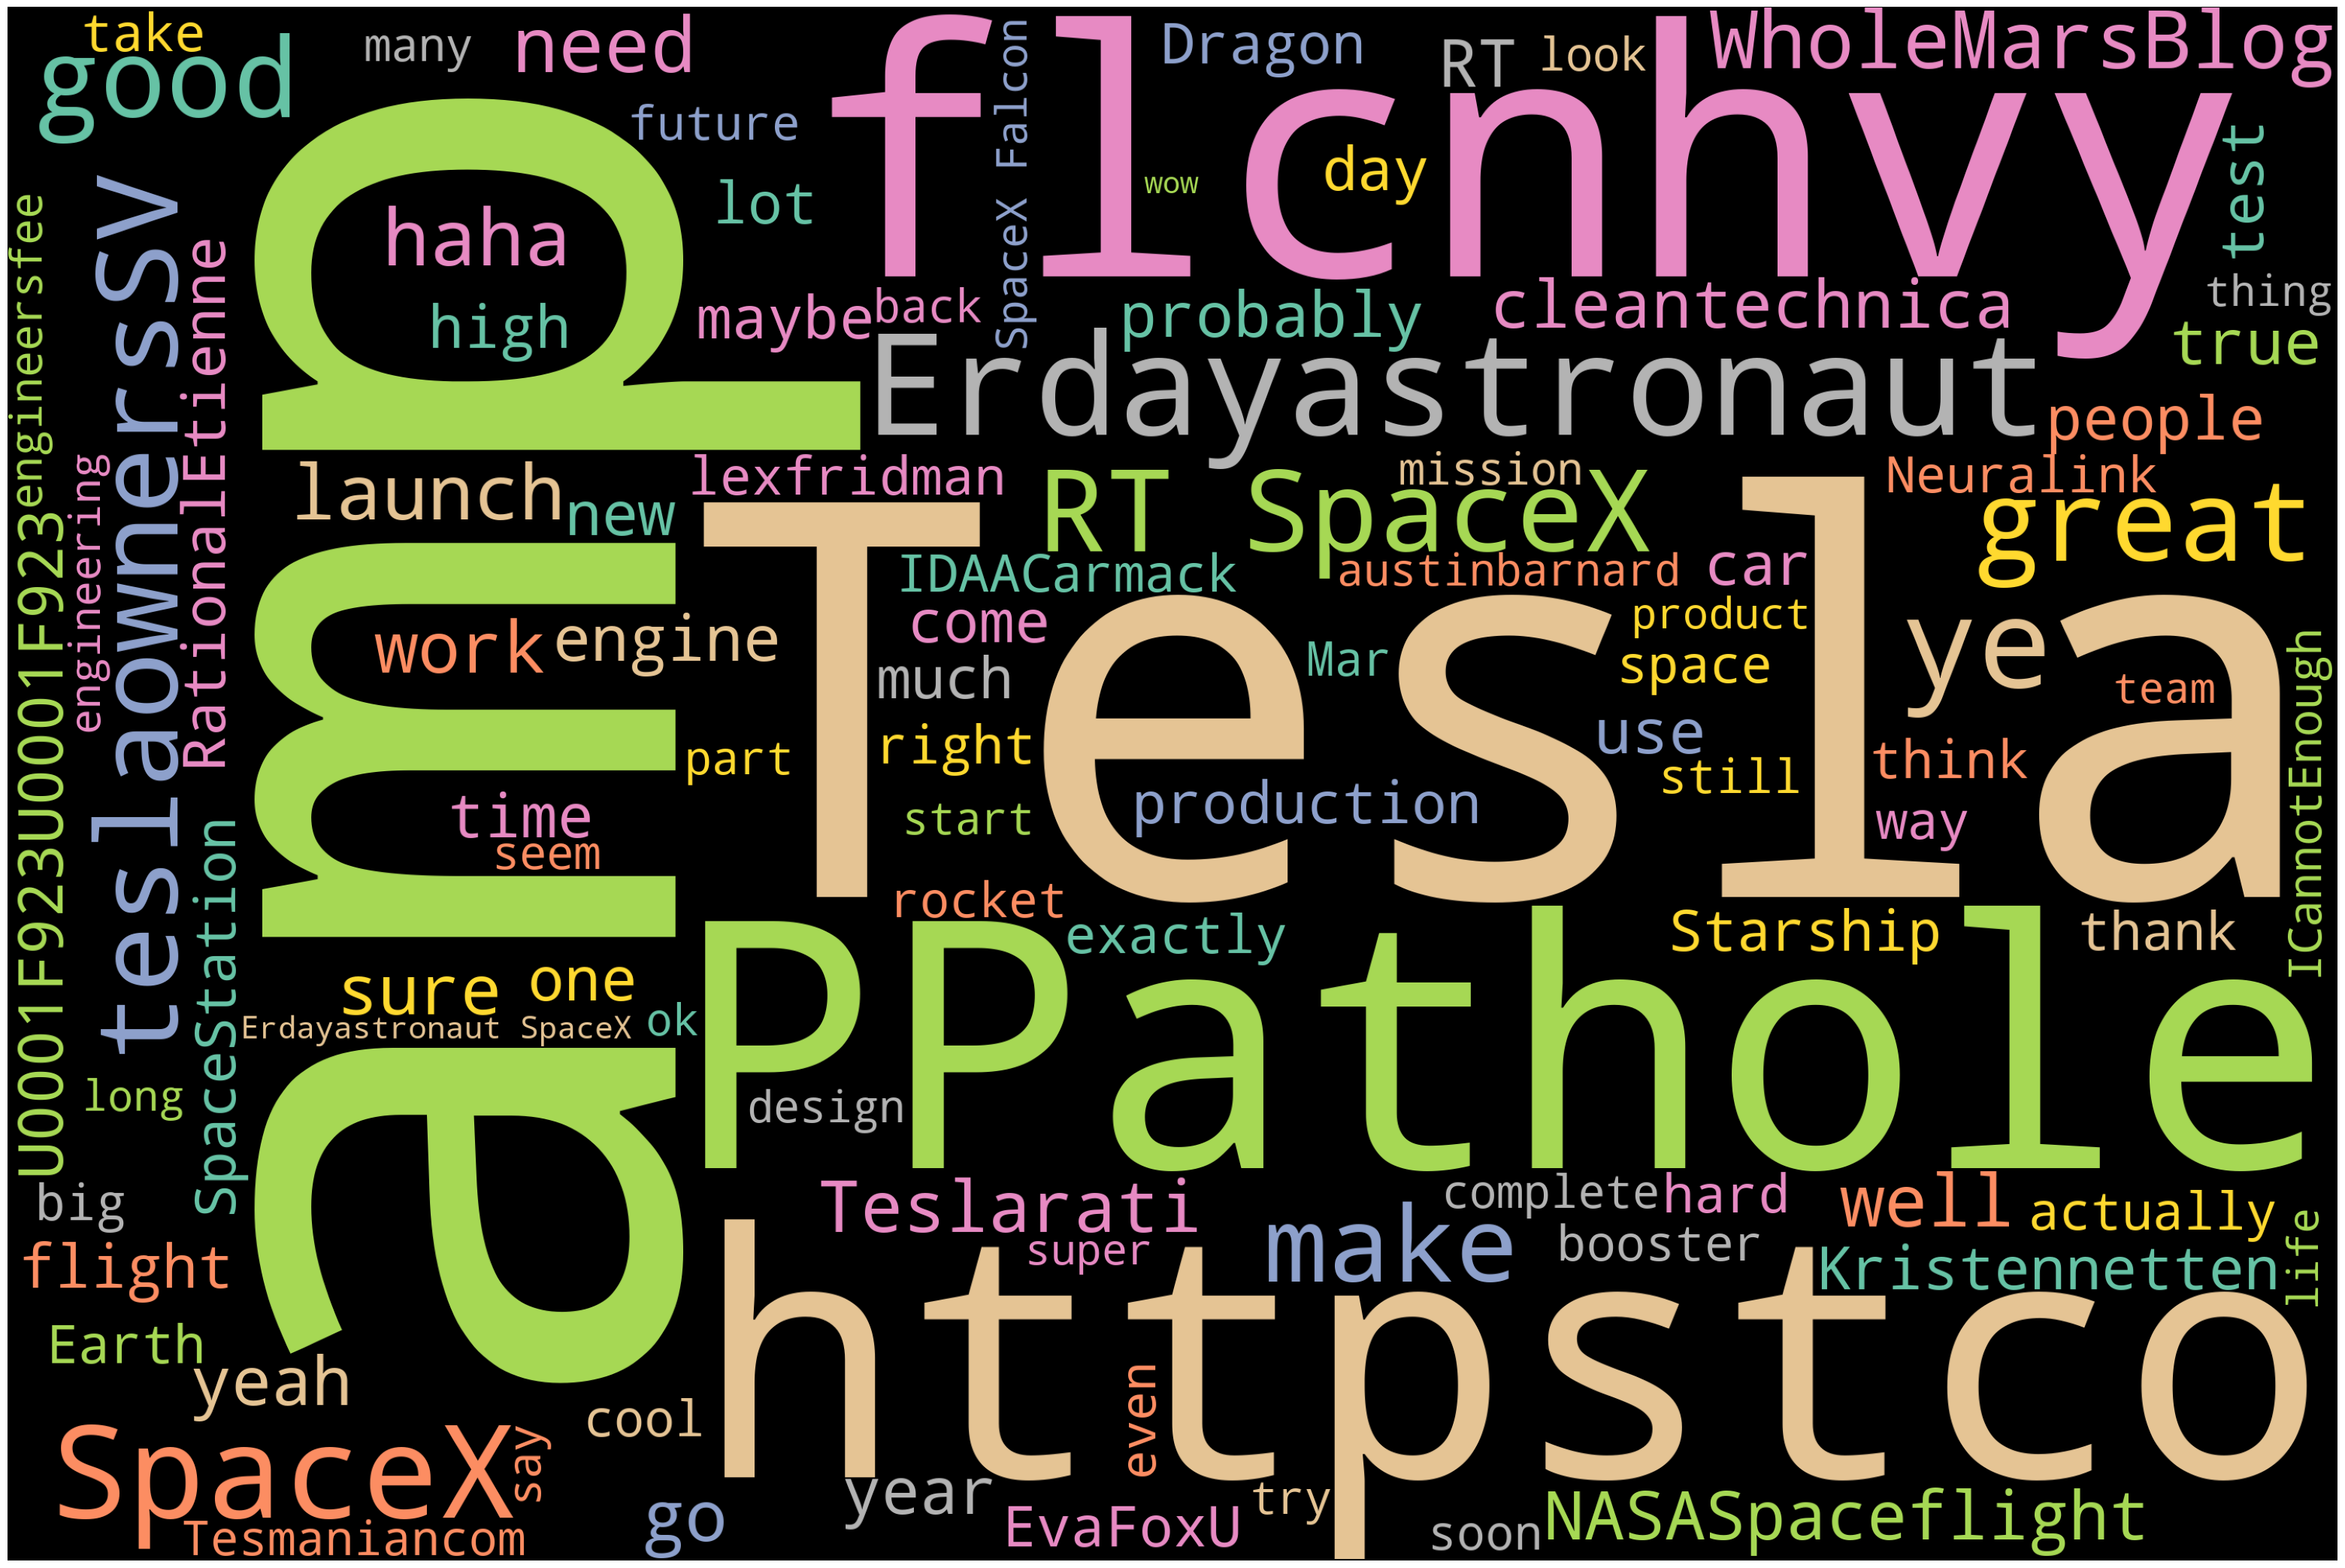

In [78]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width=3000,height=2000,background_color='black',max_words=100,colormap='Set2',stopwords=stopwords).generate(final_tweets)
plot_cloud(wordcloud)

# Named Entity Recognition

In [80]:
# parts of speech Tagging
nlp = spacy.load('en_core_web_sm')
one_block = final_tweets
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [81]:
all_ents = []
for word in doc_block.ents:
    
    all_ents.append(word.label_)
set(all_ents)

{'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART'}

In [82]:
doc_block = nlp(one_block)
for token in doc_block[:]:
    print(token,"==>",token.pos_)

kunalb ==> VERB
11 ==> NUM
I ==> PRON
 ==> PROPN
alien ==> PROPN
IDAACarmack ==> PROPN
Ray ==> PROPN
trace ==> NOUN
Cyberpunk ==> PROPN
HDR ==> PROPN
nextlevel ==> NOUN
have ==> AUX
try ==> VERB
joerogan ==> PROPN
spotify ==> VERB
great ==> ADJ
interview ==> NOUN
gtera ==> NOUN
27 ==> NUM
Doge ==> PROPN
underestimate ==> ADJ
teslacn ==> NOUN
Congratulations ==> PROPN
Tesla ==> PROPN
China ==> PROPN
amazing ==> ADJ
execution ==> NOUN
last ==> ADJ
year ==> NOUN
now ==> ADV
next ==> ADV
even ==> ADV
Happy ==> PROPN
New ==> PROPN
Year ==> PROPN
Ox ==> PROPN
httpstco ==> NOUN
9wfkmyu2oj ==> NUM
frodo ==> NOUN
underdoge ==> NOUN
all ==> DET
thought ==> NOUN
would ==> AUX
fail ==> VERB
himself ==> PRON
httpstcozgxjfdzzrm ==> ADP
OwenSparks ==> PROPN
flcnhvy ==> PROPN
anonyx ==> PROPN
10 ==> NUM
Haha ==> PROPN
thanks ==> PROPN
flcnhvy ==> PROPN
anonyx ==> PROPN
10 ==> NUM
Indeed ==> ADV
tweet ==> PROPN
definitely ==> ADV
represent ==> VERB
realworld ==> NOUN
time ==> NOUN
allocation ==> NOUN


come ==> VERB
soon ==> ADV
ErcXspace ==> PROPN
SpaceX ==> PUNCT
FelixSchlang ==> PROPN
marcushousegame ==> VERB
Erdayastronaut ==> PROPN
NASASpaceflight ==> PROPN
great ==> ADJ
render ==> NOUN
the ==> DET
circumferentia ==> PROPN
httpstco ==> NOUN
6ottsix8af ==> NUM
Model ==> PROPN
3owner ==> PROPN
FutureJurvetson ==> PROPN
CFSenergy ==> PROPN
CUPPlasma ==> PROPN
MIT ==> PROPN
that ==> SCONJ
 ==> PROPN
hard ==> ADV
have ==> AUX
try ==> VERB
push ==> VERB
c ==> PROPN
httpstco ==> PROPN
7elp9Pf9sl ==> PROPN
FutureJurvetson ==> PROPN
CFSenergy ==> PROPN
CUPPlasma ==> PROPN
MIT ==> PROPN
it ==> PRON
 ==> PROPN
cool ==> PROPN
amp ==> PROPN
sure ==> ADJ
amp ==> PROPN
do ==> AUX
I ==> PRON
suspect ==> VERB
good ==> ADJ
cas ==> PROPN
httpstcoPmYScvZozY ==> PROPN
austinbarnard ==> ADP
45 ==> NUM
Weld ==> PROPN
esthetic ==> ADJ
improve ==> NOUN
greatly ==> ADV
upcoming ==> ADJ
Starships ==> PROPN
PPathole ==> PROPN
Haha ==> PROPN
true ==> ADJ
why ==> SCONJ
shower ==> VERB
wide ==> ADJ
range ==

In [85]:
# Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[1:100])

['trace', 'nextlevel', 'try', 'spotify', 'interview', 'gtera', 'teslacn', 'execution', 'year', 'httpstco', 'frodo', 'underdoge', 'thought', 'fail', 'represent', 'realworld', 'time', 'allocation', 'outcome', 'agree', 'geoffkeighley', 'get', 'buy', 'lil', 'toddler', 'issue', 'sentencing', 'seem', 'bit', 'freewalletorg', 'thank', 'fix', 'unlock', 'account', 'power', 'haha', 'freewalletorg', 'wallet', 'give', 'avoid', 'cost', 'freewalletorg', 'app', 'suck', 'select', 'launch', 'element', 'mission', 'predict', 'cash', 'flow', 'endeavor', 'httpstco', 'need', 'pass', 'cash', 'flow', 'year', 'httpstco', 'cost', 'ton', 'carbon', 'sequester', 'value', 'product', 'make', 'scalable', 'httpstcoxmyi', 'mean', 'price', 'country', 'difference', 'tax', 'amp', 'shipping', 'tobyliiiiiiiiii', 'intend', 'idea', 'apply', 'team', 'manage', 'carbon', 'capture', 'prize', 'receive', 'stock', 'comp', 'stockoption', 'take', 'table', 'miss', 'work', 'go', 'seem', 'bit', 'itsallrisky', 'appear', 'fix', 'unit']


In [87]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq,key=lambda x:x[1],reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word','count']
wf_df

word  count
0                  amp     80
1             httpstco     69
2                 make     64
3               launch     55
4                 need     48
...                ...    ...
2265            answer      1
2266          priority      1
2267        propaganda      1
2268  httpstcowjrzibkh      1
2269                1h      1

[2270 rows x 2 columns]

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

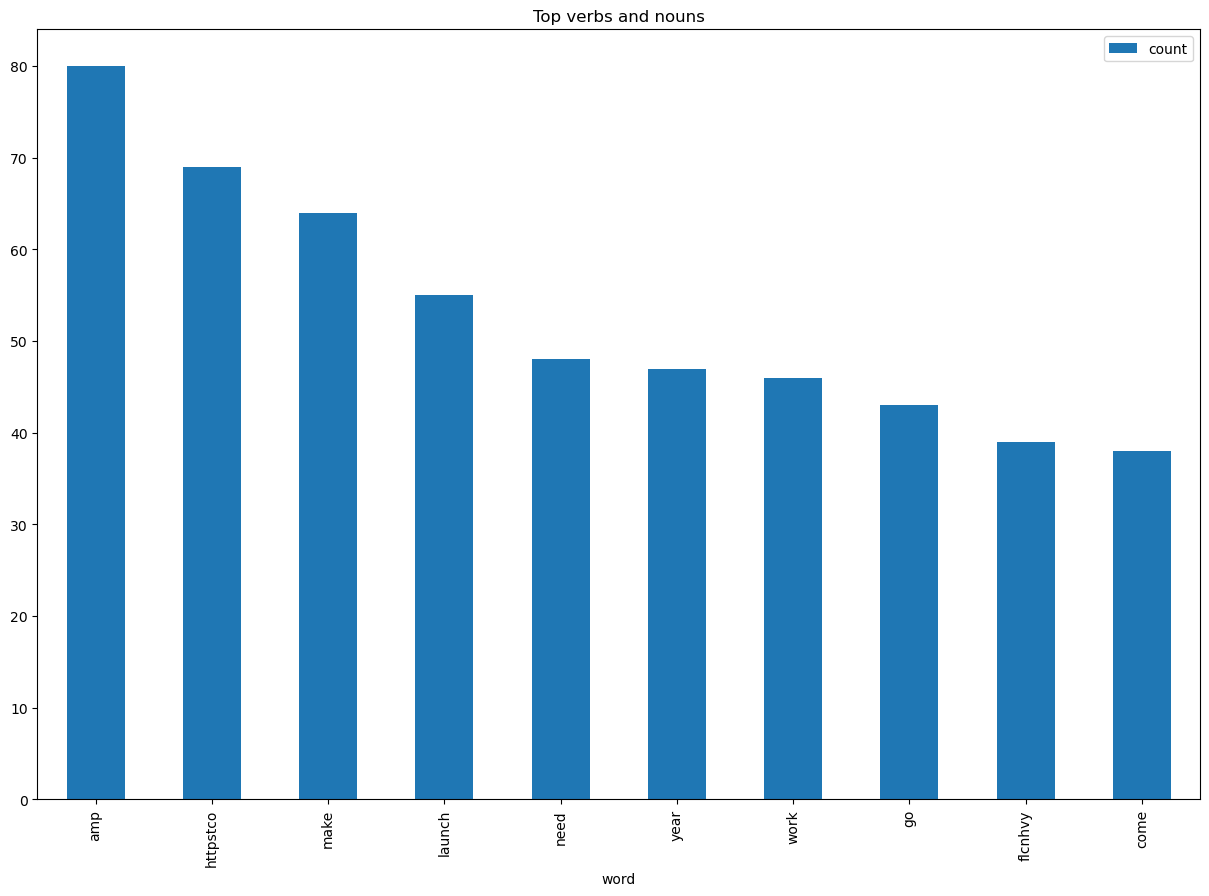

In [89]:
wf_df[0:10].plot.bar(x='word',figsize=(15,10),title='Top verbs and nouns')

# Emotional Mining - Sentimental Analysis

In [90]:
from nltk import tokenize
sentence = tokenize.sent_tokenize(''.join(df))
sentence

['@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!',
 '!Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJo

In [92]:
sentence_df = pd.DataFrame(sentence,columns=['sentence'])
sentence_df

sentence
0    @kunalb11 Im an alien@ID_AA_Carmack Ray traci...
1                                   Have you tried it?
2                  @joerogan @Spotify Great interview!
3    @gtera27 Doge is underestimated@teslacn Congra...
4                    Now on to the next for even more!
..                                                 ...
853  Everything weve ever sensed or thought has be...
854  @kenyanwalstreet Not actually a payout, just a...
855  It may never pay out, as the stock cant b
 ht...
856  Details Aug 28.AI symbiosis while u wait@vista...
857  @TeslaGong @PPathole Samwise Gamgee@PPathole A...

[858 rows x 1 columns]